# MSiA 420 - Predictive Analytics II - Final Project
## Group 6: Alejandra Lelo de Larrea Ibarra, Kiran Jyothi Sheena, Lixuan (Ellen) Chen, Wencheng Zhang

# Logistic Regression

Tutorial: https://www.justintodata.com/logistic-regression-example-in-python/

In [4]:
# Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns

import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
#from sklearn import cross_validation
from sklearn.metrics import confusion_matrix, log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report, accuracy_score, plot_roc_curve, plot_precision_recall_curve, plot_confusion_matrix

## Read standardized data

In [5]:
# read std data
df = pd.read_csv("../02_Data/hotel_bookings_dummy.csv")
df.head()

,adults,arrival_date_year,arrival_month,babies,booked_by_agent,booked_by_company,booking_changes,children,domestic,got_room_booked,...,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,meal_FB,meal_HB,meal_SC,meal_Undefined
0,2,2015,7,0,0,0,3,0,1,1,...,0,1,0,0,0,0,0,0,0,0
1,2,2015,7,0,0,0,4,0,1,1,...,0,1,0,0,0,0,0,0,0,0
2,1,2015,7,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1,2015,7,0,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
4,2,2015,7,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [6]:
# Number of features
df.shape

(119388, 43)

In [7]:
# descriptive stats 
df.describe()

,adults,arrival_date_year,arrival_month,babies,booked_by_agent,booked_by_company,booking_changes,children,domestic,got_room_booked,...,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,meal_FB,meal_HB,meal_SC,meal_Undefined
count,119388.000000,119388.000000,119388.000000,119388.000000,119388.000000,119388.000000,119388.000000,119388.000000,119388.000000,119388.000000,...,119388.000000,119388.000000,119388.000000,119388.000000,119388.000000,119388.000000,119388.000000,119388.000000,119388.000000,119388.000000
mean,1.856401,2016.156548,6.552543,0.007949,0.863135,0.056932,0.221103,0.103888,0.406984,0.875063,...,0.044351,0.105589,0.165930,0.202851,0.473054,0.000017,0.006684,0.121143,0.089205,0.009792
std,0.579266,0.707478,3.090610,0.097437,0.343706,0.231714,0.652287,0.398558,0.491274,0.330649,...,0.205875,0.307312,0.372019,0.402124,0.499275,0.004093,0.081483,0.326295,0.285041,0.098467
min,0.000000,2015.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2016.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,2016.000000,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,2017.000000,9.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,55.000000,2017.000000,12.000000,10.000000,1.000000,1.000000,21.000000,10.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
# check null values 
df.isna().sum()

adults                           0
arrival_date_year                0
arrival_month                    0
babies                           0
booked_by_agent                  0
booked_by_company                0
booking_changes                  0
children                         0
domestic                         0
got_room_booked                  0
hotel                            0
is_canceled                      0
is_repeated_guest                0
log_adr                          0
log_days_in_waiting_list         0
log_lead_time                    0
previous_bookings                0
previous_cancellations           0
required_car_parking             0
total_nights                     0
total_of_special_requests        0
continent_Americas               0
continent_Antarctica             0
continent_Asia                   0
continent_Europe                 0
continent_Oceania                0
continent_unknown                0
customer_type_Group              0
customer_type_Transi

In [9]:
# Print feature names 
df.columns

Index(['adults', 'arrival_date_year', 'arrival_month', 'babies',
       'booked_by_agent', 'booked_by_company', 'booking_changes', 'children',
       'domestic', 'got_room_booked', 'hotel', 'is_canceled',
       'is_repeated_guest', 'log_adr', 'log_days_in_waiting_list',
       'log_lead_time', 'previous_bookings', 'previous_cancellations',
       'required_car_parking', 'total_nights', 'total_of_special_requests',
       'continent_Americas', 'continent_Antarctica', 'continent_Asia',
       'continent_Europe', 'continent_Oceania', 'continent_unknown',
       'customer_type_Group', 'customer_type_Transient',
       'customer_type_Transient-Party', 'deposit_type_Non Refund',
       'deposit_type_Refundable', 'market_segment_Complementary',
       'market_segment_Corporate', 'market_segment_Direct',
       'market_segment_Groups', 'market_segment_Offline TA/TO',
       'market_segment_Online TA', 'market_segment_Undefined', 'meal_FB',
       'meal_HB', 'meal_SC', 'meal_Undefined'],
     

## Splitting training and test 

In [10]:
# get train indexes
train_ind = pd.read_csv("../02_Data/train_index.csv")

# split train
train = df.iloc[train_ind.Train_Index,:]
train.reset_index(inplace = True, drop = True)

# Split test 
test = df.iloc[df.index.difference(train_ind.Train_Index),:]

In [11]:
# Check class imbalance in train and test 
print("Train Class Response:")
print(train.is_canceled.value_counts()/train.shape[0]*100)

print("Test Class Response:")
print(test.is_canceled.value_counts()/test.shape[0]*100)

Train Class Response:
0    62.941441
1    37.058559
Name: is_canceled, dtype: float64
Test Class Response:
0    63.027181
1    36.972819
Name: is_canceled, dtype: float64


## Scaling data

In [12]:
# Scale numeric columns 
scaler = StandardScaler()
scaler.fit(train.drop("is_canceled", axis = 1))

# Scale train data
xtrain = scaler.transform(train.drop("is_canceled", axis = 1))
ytrain = train.is_canceled

In [13]:
# Scale test data with train scaler 
xtest = scaler.transform(test.drop("is_canceled", axis = 1))
ytest = test.is_canceled

In [14]:
dftrain = pd.DataFrame(xtrain)
dftrain.columns = train.drop("is_canceled", axis = 1).columns
dftrain.to_csv("xtrain.csv", index = False)
pd.DataFrame(ytrain).to_csv("ytrain.csv", index = False)

## Fit logistic regresssion model with sklearn

In [12]:
# Fit model with sklearn
alpha = 1
c_val = 1/alpha

mod = LogisticRegression(penalty = 'l1', solver = 'liblinear', C = c_val, max_iter = 100)
mod.fit(xtrain, ytrain)

LogisticRegression(penalty='l1', solver='liblinear')

In [13]:
# Coefficients 
coeffs = np.hstack((mod.intercept_, mod.coef_[0]))
pd.DataFrame(data = {'variable': ['intercept'] + list(train.drop("is_canceled", axis = 1).columns),
                     'coeff': coeffs})

,variable,coeff
0,intercept,-1.758638
1,adults,0.072965
2,arrival_date_year,0.187011
3,arrival_month,0.067347
4,babies,0.003554
5,booked_by_agent,-0.016948
6,booked_by_company,-0.150022
7,booking_changes,-0.202072
8,children,0.061953
9,domestic,0.987827


In [14]:
# Predictions for test 
yhat_test = mod.predict(xtest)

# --- Metrics---
conf_matrix = confusion_matrix(ytest, yhat_test)
print('--- EVALUATION METRICS ---:')
print('\nConfusion Matrix:')
print(conf_matrix)

print('\nUsing 0.5 as threshold:')
print('Accuracy = {:.5f}'.format(accuracy_score(ytest, yhat_test)))
print('Precision = {:.5f}'.format(precision_score(ytest, yhat_test)))
print('Recall = {:.5f}'.format(recall_score(ytest, yhat_test)))
print('F1 score = {:.5f}'.format(f1_score(ytest, yhat_test)))

--- EVALUATION METRICS ---:

Confusion Matrix:
[[13679  1370]
 [ 2771  6057]]

Using 0.5 as threshold:
Accuracy = 0.82657
Precision = 0.81554
Recall = 0.68611
F1 score = 0.74525


/Users/alelli/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/Users/alelli/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


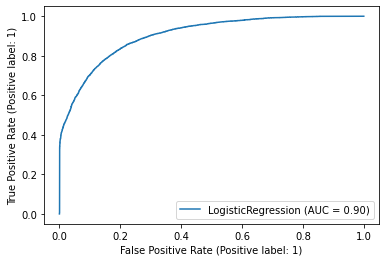

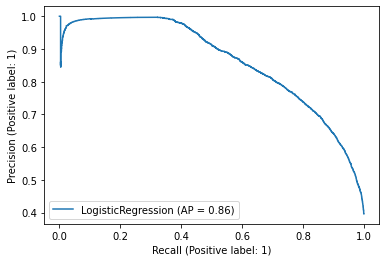

In [15]:
# ROC curve
plot_roc_curve(mod, xtest, ytest)

# Precision-recall curve 
plot_precision_recall_curve(mod, xtest, ytest)

# Fit Logistic Regression with stats

In [40]:
# Logistic regression with stats
mod1 = sm.Logit(ytrain, xtrain).fit()

/Users/alelli/opt/anaconda3/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/alelli/opt/anaconda3/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


         Current function value: inf
         Iterations: 35


LinAlgError: Singular matrix

In [ ]:
#print(mod1.summary())

## Logistic regression with Regularization & CV

In [15]:
# Create logistic regression object 
logistic = LogisticRegression()

# list of penalty
penalty = ['l1','l2']

# list of alphas 
alpha = [0.001, 1]
C = [1/i for i in alpha]

# Combine hyperparams 
hyperparams = dict(C=C, penalty = penalty)

# Use gridsearch to fit model 
cv_hyper = GridSearchCV(logistic, hyperparams, cv = 10,  verbose = 0)
best_mod = cv_hyper.fit(xtrain,ytrain)

print("Best penalty:", best_mod.best_estimator_.get_params()['penalty'])
print("Best C:", best_mod.best_estimator_.get_params()['C'])

/Users/alelli/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/alelli/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

Best penalty: l2
Best C: 1.0


/Users/alelli/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
# Model evaluation with best params 
kfold = KFold(n_splits = 10, random_state = 190322, shuffle = True)
model = LogisticRegression(C=best_mod.best_estimator_.get_params()['C'],
                         penalty = best_mod.best_estimator_.get_params()['penalty'])
results = cross_val_score(model, xtrain, ytrain, cv = kfold)
results

/Users/alelli/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/alelli/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

array([0.82642379, 0.83059366, 0.82389279, 0.82085645, 0.81949534,
       0.82870904, 0.8252539 , 0.81970474, 0.82431159, 0.83090776])

In [21]:
#!pip install setuptools==58
#!pip install regressors

from sklearn.linear_model import Ridge
from regressors import stats
ridgemod = Ridge(alpha = 1, normalize = True)
ridgemod.fit(xtrain, ytrain)

a=stats.summary(ridgemod,xtrain,ytrain)

Residuals:
    Min     1Q  Median     3Q    Max
-0.4745 0.2454  0.3468 0.4482 1.3082


Coefficients:
            Estimate  Std. Error   t value   p value
_intercept  0.370586    0.001252  296.0583  0.000000
x1          0.009205    0.001336    6.8919  0.000000
x2          0.006001    0.001544    3.8869  0.000102
x3          0.002086    0.001454    1.4341  0.151557
x4         -0.002172    0.001262   -1.7205  0.085342
x5          0.007787    0.001773    4.3917  0.000011
x6         -0.009189    0.001978   -4.6456  0.000003
x7         -0.019072    0.001291  -14.7689  0.000000
x8          0.006319    0.001293    4.8884  0.000001
x9          0.068910    0.001515   45.4902  0.000000
x10         0.038732    0.001314   29.4869  0.000000
x11        -0.012836    0.001452   -8.8398  0.000000
x12        -0.007124    0.001433   -4.9713  0.000001
x13         0.013411    0.001537    8.7273  0.000000
x14         0.004753    0.001302    3.6505  0.000262
x15         0.052500    0.001573   33.3709  0.00000

/Users/alelli/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


In [20]:
train.columns[[3,4,16,21,22,23,24, 26,31,32,37,38]]

Index(['babies', 'booked_by_agent', 'previous_bookings', 'continent_Americas',
       'continent_Antarctica', 'continent_Asia', 'continent_Europe',
       'continent_unknown', 'deposit_type_Refundable',
       'market_segment_Complementary', 'market_segment_Online TA',
       'market_segment_Undefined'],
      dtype='object')

In [39]:
signif = pd.DataFrame({"Coef":['intercept'] + list(train.columns.difference(['is_canceled'])),
                            "pvals":stats.coef_pval(ridgemod,xtrain,ytrain)})
signif["Is Significant"] = np.where(signif.pvals<=0.05, "yes", "no")
signif

,Coef,pvals,Is Significant
0,intercept,0.000000e+00,yes
1,adults,5.539125e-12,yes
2,arrival_date_year,1.016117e-04,yes
3,arrival_month,1.515567e-01,no
4,babies,8.534176e-02,no
5,booked_by_agent,1.125705e-05,yes
6,booked_by_company,3.395657e-06,yes
7,booking_changes,0.000000e+00,yes
8,children,1.018054e-06,yes
9,continent_Americas,0.000000e+00,yes
